[*********************100%***********************]  1 of 1 completed


/Users/Justin/Desktop/Programming/Python/Explorium2/transformations_deduping/ipynb/algo_crypto_trading/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


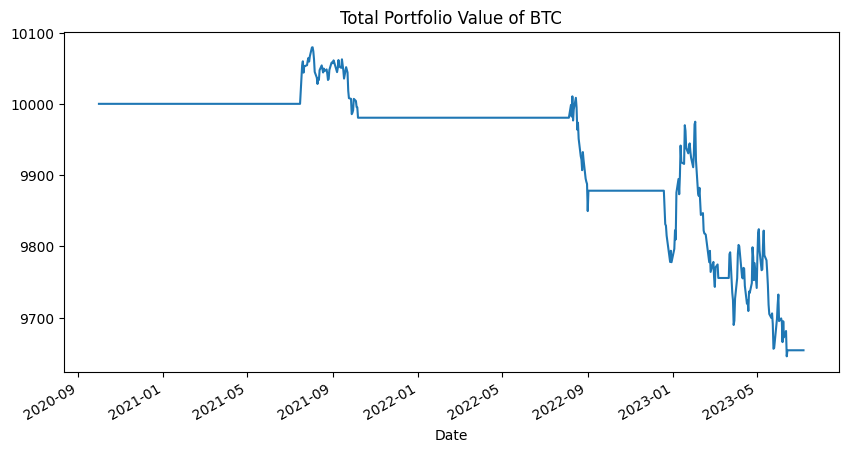

Overall return of the strategy: -3.46%


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_reversion(symbol, short_window=20, long_window=100):
    # Download historical data as dataframe
    data = yf.download(symbol, start='2019-01-01', end='2023-12-31')

    # Calculate the short window simple moving average
    data['short_window_sma'] = data['Close'].rolling(window=short_window).mean()

    # Calculate the long window simple moving average
    data['long_window_sma'] = data['Close'].rolling(window=long_window).mean()

    # Create signals based on the crossover of the short and long moving averages
    data['signal'] = 0.0
    data['signal'][short_window:] = np.where(data['short_window_sma'][short_window:] > data['long_window_sma'][short_window:], 1.0, 0.0)

    # Generate trading orders based on the signals
    data['positions'] = data['signal'].diff()

    return data

def generate_trading_orders(data):
    # Buy (+1) and sell (-1) signals
    buys = data.loc[data['positions'] == 1.0]
    sells = data.loc[data['positions'] == -1.0]

    return buys, sells

def simulate_trading(symbol):
    data = calculate_mean_reversion(symbol)
    initial_capital = float(10000.0)

    # Create a DataFrame `positions`
    positions = pd.DataFrame(index=data.index).fillna(0.0)
    positions[symbol] = 100*data['signal']   # This strategy buys 100 shares

    # Initialize the portfolio with value owned   
    portfolio = positions.multiply(data['Close'], axis=0)

    # Store the difference in shares owned   
    pos_diff = positions.diff()

    # Add `holdings` to portfolio
    portfolio['holdings'] = (positions.multiply(data['Close'], axis=0)).sum(axis=1)

    # Add `cash` to portfolio
    portfolio['cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()   

    # Add `total` to portfolio
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    # Add `returns` to portfolio
    portfolio['returns'] = portfolio['total'].pct_change()

    return portfolio

if __name__ == "__main__":
    symbol = 'BTC'  # Apple Inc.
    result = simulate_trading(symbol)

     # Plot the total portfolio value over time
    plt.figure(figsize=(10,5))
    result['total'].plot()
    plt.title(f"Total Portfolio Value of {symbol}")
    plt.show()

    # Plot the total portfolio value over time
    plt.figure(figsize=(10,5))
    result['total'].plot()
    plt.title(f"Total Portfolio Value of {symbol}")
    plt.show()

    # Calculate and print the overall return
    total_return = result['total'][-1] / result['total'][0] - 1
    print(f"Overall return of the strategy: {total_return * 100:.2f}%")
